In [1]:
from datasets import load_dataset
import pandas as pd
import os
from utils.filemanagement import load_from_file,save_preprocessed_df_to_file
import matplotlib.pyplot as plt
from utils.filemanagement import ROOT_PATH

In [2]:
folder_path_data = r"preprocessed_data"
file_name_previous_data ="NPL_unprocessed.csv"
file_name_data ="np_large_raw.csv"

import csv
file_path = os.path.join(ROOT_PATH,folder_path_data,"data",file_name_previous_data)

df = pd.read_csv(file_path,index_col=0,encoding="latin-1")
#df_one = load_from_file(folder_path_data, file_name_data,index_col=0)

In [3]:
df['date'] = pd.to_datetime(df['label'],format="%Y")#pd.to_datetime(df['label'])

In [4]:
df.head()

,text,label,date
0,"Hvis ingen har noe å innvende, skal jeg etterk...",1998,1998-01-01
1,Fungerende president vil anmode sekretæren for...,1998,1998-01-01
2,Odelstinget skal foreta valg av presidenter og...,1998,1998-01-01
3,Jeg foreslår Gunnar Skaug.,1998,1998-01-01
4,Gunnar Skaug er foreslått valgt til Odelstinge...,1998,1998-01-01


In [5]:
df = df[df['text'].str.strip().astype(bool)]

In [6]:
file_path = os.path.join(ROOT_PATH,folder_path_data,"data",file_name_data)
df.to_csv(file_path,encoding="utf-8")

In [7]:
df = pd.read_csv(file_path,index_col=0,encoding="utf-8")

In [8]:
df.describe()

,label
count,386797.000000
mean,2010.553714
std,7.108589
min,1998.000000
25%,2004.000000
50%,2011.000000
75%,2017.000000
max,2022.000000


In [9]:
df.head()

,text,label,date
0,"Hvis ingen har noe å innvende, skal jeg etterk...",1998,1998-01-01
1,Fungerende president vil anmode sekretæren for...,1998,1998-01-01
2,Odelstinget skal foreta valg av presidenter og...,1998,1998-01-01
3,Jeg foreslår Gunnar Skaug.,1998,1998-01-01
4,Gunnar Skaug er foreslått valgt til Odelstinge...,1998,1998-01-01


In [10]:
df

,text,label,date
0,"Hvis ingen har noe å innvende, skal jeg etterk...",1998,1998-01-01
1,Fungerende president vil anmode sekretæren for...,1998,1998-01-01
2,Odelstinget skal foreta valg av presidenter og...,1998,1998-01-01
3,Jeg foreslår Gunnar Skaug.,1998,1998-01-01
4,Gunnar Skaug er foreslått valgt til Odelstinge...,1998,1998-01-01
...,...,...,...
386792,Debatten i sak nr. 2 er omme.,2022,2022-01-01
386793,Da går vi til votering over sakene på dagens k...,2022,2022-01-01
386794,Presidenten foreslår at redegjørelsen vedlegge...,2022,2022-01-01
386795,Sak nr. 2 var interpellasjon.,2022,2022-01-01


In [11]:
df.text.map(len).max()

72322

In [12]:
df.text.map(len).min()

1

In [13]:
import numpy as np
lengths = df["text"].str.len()
argmax = np.where(lengths == lengths.max())[0]
df.iloc[argmax]

,text,label,date
347520,Under debatten er det satt frem i alt 223 fors...,2020,2020-01-01


In [14]:
lengths = df["text"].str.len()
argmax = np.where(lengths == lengths.min())[0]
df.iloc[argmax]

,text,label,date
287137,.,2017,2017-01-01
373038,»,2021,2021-01-01


In [15]:
df['date'].unique()

array(['1998-01-01', '1999-01-01', '2000-01-01', '2001-01-01',
       '2002-01-01', '2003-01-01', '2004-01-01', '2005-01-01',
       '2006-01-01', '2007-01-01', '2008-01-01', '2009-01-01',
       '2010-01-01', '2011-01-01', '2012-01-01', '2013-01-01',
       '2014-01-01', '2015-01-01', '2016-01-01', '2017-01-01',
       '2018-01-01', '2019-01-01', '2020-01-01', '2021-01-01',
       '2022-01-01'], dtype=object)

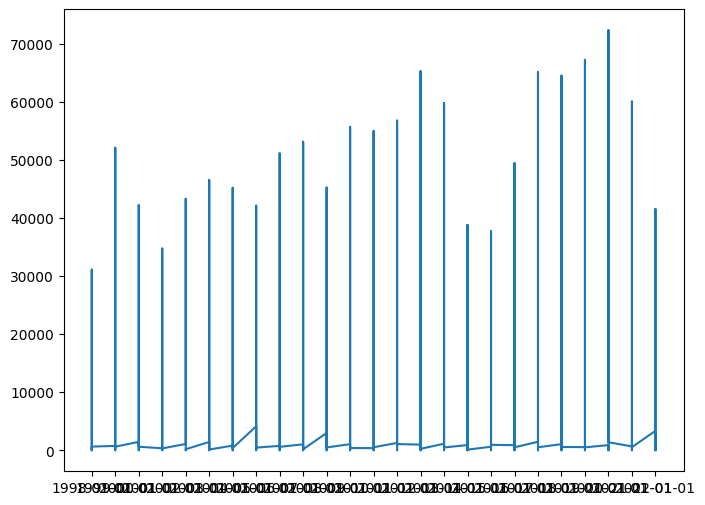

In [16]:
data = df["text"].str.len()

fig,ax = plt.subplots(figsize=(8,6))
ax.plot(df['date'],data)

df['date'] =pd.to_datetime(df['date'])

In [17]:
df.date

0        1998-01-01
1        1998-01-01
2        1998-01-01
3        1998-01-01
4        1998-01-01
            ...    
386792   2022-01-01
386793   2022-01-01
386794   2022-01-01
386795   2022-01-01
386796   2022-01-01
Name: date, Length: 386797, dtype: datetime64[ns]

In [18]:
vocab = set()
df['text'].str.lower().str.split().apply(vocab.update)
print(f"Length of vocab: {len(vocab)}")



Length of vocab: 919359


In [19]:
print(list(vocab)[0:1000])

['«old', 'skolebyråkrat.', 'grei»-', 'läsfrihet', 'sårheit.', 'fattigdomssatsinga.', 'verneområda,', '4-6.', 'laurdagsaviser', 'rekeindustri,', 'sørsamer,', 'nyhetsformidler.', 'helgeturen', 'tunna,', 'hovudproblema.', 'evalueringstidspunktet', 'lokalbåt.', 'forsyningen.', 'kjøpstedene', 'kartleggingsprosjektet', 'gjenfangsten', 'tradisjonsformidling.', '«ranet»', 'debattarenaen,', '«hovedarbeidsoppgavene', 'strømprisprosent.', 'adelskap.', 'kortest.', 'bildelingsordningen.', 'etterspørselsbildet.', 'siidaene.', 'leverandørnæringa.', 'arter,', '«gjennomgang»', 'reisefot', 'ressurseffektiv.»', 'sosialpolitiker.', 'krev?»', 'pedersen-utvalget.', 'økosystemforvaltning,', 'tikronene', 'oversendelsene', 'fiendetenkinga.', 'modis', 'dyrepopulasjonen,', 'aleneganger,', 'nyskapninger,', 'brukerkonflikter,', 'kansler,', 'lokaliseringspolitikken', 'dvergene', 'havforskning', 'rusbrukerne', 'hongkong-befolkningens', 'informasjonsprosjektet', 'ace-skolenes', 'profitere', 'kunstnarorganisasjonane,'

In [20]:
print(f"Max tokens: {df.text.map(len).max()}")

Max tokens: 72322


In [21]:
print(f"Min tokens: {df.text.map(len).min()}")

Min tokens: 1


In [22]:
r = list(df['text'])

In [23]:
res = 0
for item in r:
    res+= len(item)
print(f"Tokens in dataset: {res}")

Tokens in dataset: 519299398


In [24]:
from utils.dataset_stats import get_data_stats
from utils.filemanagement import write_dataset_stats

stats = get_data_stats(df['text'])
print(stats)

write_dataset_stats(folder_path_data,file_name_data,stats)

[386797, 599436, 94530866, 157.69968103350482, 244.39399995346398, 131.0578753196121, 14819, 1]
